### This notebook works on the relation extracted triplets made using REBEL for Knowledge Graphs:

- Head (Node)
- Edge (Relation)
- Tail (Node)

In [1]:
!pip install -q neo4j networkx plotly graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.5/293.5 kB 2.5 MB/s eta 0:00:00


In [2]:
import os
from google.colab import files
uploaded = files.upload()

Saving rebel_babelscape_rebel-large.csv to rebel_babelscape_rebel-large.csv


In [3]:
import pandas as pd
df_rebel=pd.read_csv('rebel_babelscape_rebel-large.csv')
df_rebel.head()

,url,triplet
0,https://www.equipmentsalesandsurplus.com/v/vsp...,"[{'head': 'table sawing', 'type': 'subclass of..."
1,https://www.equipmentsalesandsurplus.com/v/vsp...,"[{'head': 'table sawing machine', 'type': 'sub..."
2,https://www.equipmentsalesandsurplus.com/v/vsp...,"[{'head': 'table sawing machine', 'type': 'has..."
3,https://texasfurniturehut.com/images/thumbs/00...,"[{'head': 'recliner', 'type': 'subclass of', '..."
4,https://texasfurniturehut.com/images/thumbs/00...,"[{'head': 'leather', 'type': 'subclass of', 't..."


In [4]:
import ast
def str_to_dict(s):
    try:
        return ast.literal_eval(s)
    except (ValueError, SyntaxError) as e:
        print(f"Error converting {s}: {e}")
        return None

In [5]:
df_rebel

,url,triplet
0,https://www.equipmentsalesandsurplus.com/v/vsp...,"[{'head': 'table sawing', 'type': 'subclass of..."
1,https://www.equipmentsalesandsurplus.com/v/vsp...,"[{'head': 'table sawing machine', 'type': 'sub..."
2,https://www.equipmentsalesandsurplus.com/v/vsp...,"[{'head': 'table sawing machine', 'type': 'has..."
3,https://texasfurniturehut.com/images/thumbs/00...,"[{'head': 'recliner', 'type': 'subclass of', '..."
4,https://texasfurniturehut.com/images/thumbs/00...,"[{'head': 'leather', 'type': 'subclass of', 't..."
...,...,...
2995,https://static.wixstatic.com/media/c3a8ba_1165...,"[{'head': ""'a couple of men standing next to e..."
2996,https://static.wixstatic.com/media/c3a8ba_1165...,"[{'head': ""'a couple of men standing next to e..."
2997,https://cdn.theluxurycloset.com/uploads/opt/pr...,"[{'head': 'shoe', 'type': 'has part', 'tail': ..."
2998,https://cdn.theluxurycloset.com/uploads/opt/pr...,"[{'head': 'shoes', 'type': 'has part', 'tail':..."


In [6]:
df_rebel['triplet'] = df_rebel['triplet'].apply(str_to_dict)

# Print DataFrame after conversion
print("\nDataFrame after conversion:")
print(df_rebel)


DataFrame after conversion:
                                                    url  \
0     https://www.equipmentsalesandsurplus.com/v/vsp...   
1     https://www.equipmentsalesandsurplus.com/v/vsp...   
2     https://www.equipmentsalesandsurplus.com/v/vsp...   
3     https://texasfurniturehut.com/images/thumbs/00...   
4     https://texasfurniturehut.com/images/thumbs/00...   
...                                                 ...   
2995  https://static.wixstatic.com/media/c3a8ba_1165...   
2996  https://static.wixstatic.com/media/c3a8ba_1165...   
2997  https://cdn.theluxurycloset.com/uploads/opt/pr...   
2998  https://cdn.theluxurycloset.com/uploads/opt/pr...   
2999  https://cdn.theluxurycloset.com/uploads/opt/pr...   

                                                triplet  
0     [{'head': 'table sawing', 'type': 'subclass of...  
1     [{'head': 'table sawing machine', 'type': 'sub...  
2     [{'head': 'table sawing machine', 'type': 'has...  
3     [{'head': 'recliner', 't

In [7]:
df_rebel = df_rebel[df_rebel['triplet'].apply(lambda x: isinstance(x, list))]

# Print final DataFrame
print("\nFinal DataFrame:")
print(df_rebel)


Final DataFrame:
                                                    url  \
0     https://www.equipmentsalesandsurplus.com/v/vsp...   
1     https://www.equipmentsalesandsurplus.com/v/vsp...   
2     https://www.equipmentsalesandsurplus.com/v/vsp...   
3     https://texasfurniturehut.com/images/thumbs/00...   
4     https://texasfurniturehut.com/images/thumbs/00...   
...                                                 ...   
2995  https://static.wixstatic.com/media/c3a8ba_1165...   
2996  https://static.wixstatic.com/media/c3a8ba_1165...   
2997  https://cdn.theluxurycloset.com/uploads/opt/pr...   
2998  https://cdn.theluxurycloset.com/uploads/opt/pr...   
2999  https://cdn.theluxurycloset.com/uploads/opt/pr...   

                                                triplet  
0     [{'head': 'table sawing', 'type': 'subclass of...  
1     [{'head': 'table sawing machine', 'type': 'sub...  
2     [{'head': 'table sawing machine', 'type': 'has...  
3     [{'head': 'recliner', 'type': 'subc

In [19]:
triplet=df_rebel['triplet'][200:300].tolist()
triplets = [item for sublist in triplet for item in sublist]
len(triplets)
triplets

[{'head': 'cabinets', 'type': 'part of', 'tail': 'kitchen'},
 {'head': 'appliances', 'type': 'part of', 'tail': 'kitchen'},
 {'head': 'signs', 'type': 'part of', 'tail': 'street'},
 {'head': 'signs', 'type': 'subclass of', 'tail': 'walking'},
 {'head': 'signs', 'type': 'part of', 'tail': 'walking'},
 {'head': 'chain strap', 'type': 'part of', 'tail': 'purse'},
 {'head': 'purse', 'type': 'has part', 'tail': 'chain strap'},
 {'head': 'chain', 'type': 'part of', 'tail': 'purse'},
 {'head': 'hose', 'type': 'has part', 'tail': 'fitting'},
 {'head': 'hose', 'type': 'has part', 'tail': 'fitting'},
 {'head': 'fitting', 'type': 'part of', 'tail': 'hose'},
 {'head': 'blue', 'type': 'opposite of', 'tail': 'white'},
 {'head': 'courtroom', 'type': 'subclass of', 'tail': 'group of people'},
 {'head': 'courtroom', 'type': 'subclass of', 'tail': 'group'},
 {'head': 'courtroom',
  'type': 'subclass of',
  'tail': 'group of people standing next to each other'},
 {'head': "'a painting of a woman in a col

## Using Neo4j
Neo4j is a graph database management system designed to store and manage relationships between data points.
Neo4j is highly efficient for handling complex queries on graph data, such as traversing relationships or identifying patterns within the graph

Here, Neo4j is used to create a knowledge graph by storing extracted triplets in the database, with nodes representing entities and relationships as edges.

In [20]:
from neo4j import GraphDatabase

# Connect to Neo4j
uri = "neo4j+s://6b479450.databases.neo4j.io"  # Replace with your Neo4j instance URI
username = "neo4j"
password = "a-kw5fZ6cRB0oe66mDO5JRrRZ1ynC1ym-IeokE1qq0o"  # Replace with your Neo4j password
driver = GraphDatabase.driver(uri, auth=(username,password))

def create_nodes_and_relationships(tx, head, type_, tail):
    query = (
        "MERGE (a:head {name: $head}) "
        "MERGE (b: tail {name: $tail}) "
        "MERGE (a)-[r : Relation {type: $type}]->(b)"
    )
    tx.run(query, head=head, type=type_, tail=tail)

#df_rebel_text=df_rebel['triplet'].tolist()
# Open a session and add data
with driver.session() as session:
    for row in triplets:
        session.write_transaction(create_nodes_and_relationships, row['head'], row['type'], row['tail'])

print("Knowledge graph created successfully!")

driver.close()

<ipython-input-20-fc4b42f95bc0>:21: DeprecationWarning: write_transaction has been renamed to execute_write
  session.write_transaction(create_nodes_and_relationships, row['head'], row['type'], row['tail'])


Knowledge graph created successfully!


The graph data is stored within the Neo4j database, where it can be queried and manipulated using Cypher queries. The data isn't exported as a file in this method but remains within the database environment.

### Accessing the graph data:

open the neo4j instance, run the Cypher query
MATCH (n)-[r]->(m)
RETURN n, r, m

Press play button on the screen


## NetworkX
NetworkX is a Python library used for the creation, manipulation, and study of complex networks. Matplotlib is used to visualize these networks.
NetworkX allows you to visualize and analyze the structure of your knowledge graph easily.

Here, NetworkX creates a directed graph (DiGraph) from the extracted triplets, and Matplotlib is used to render and display the graph.

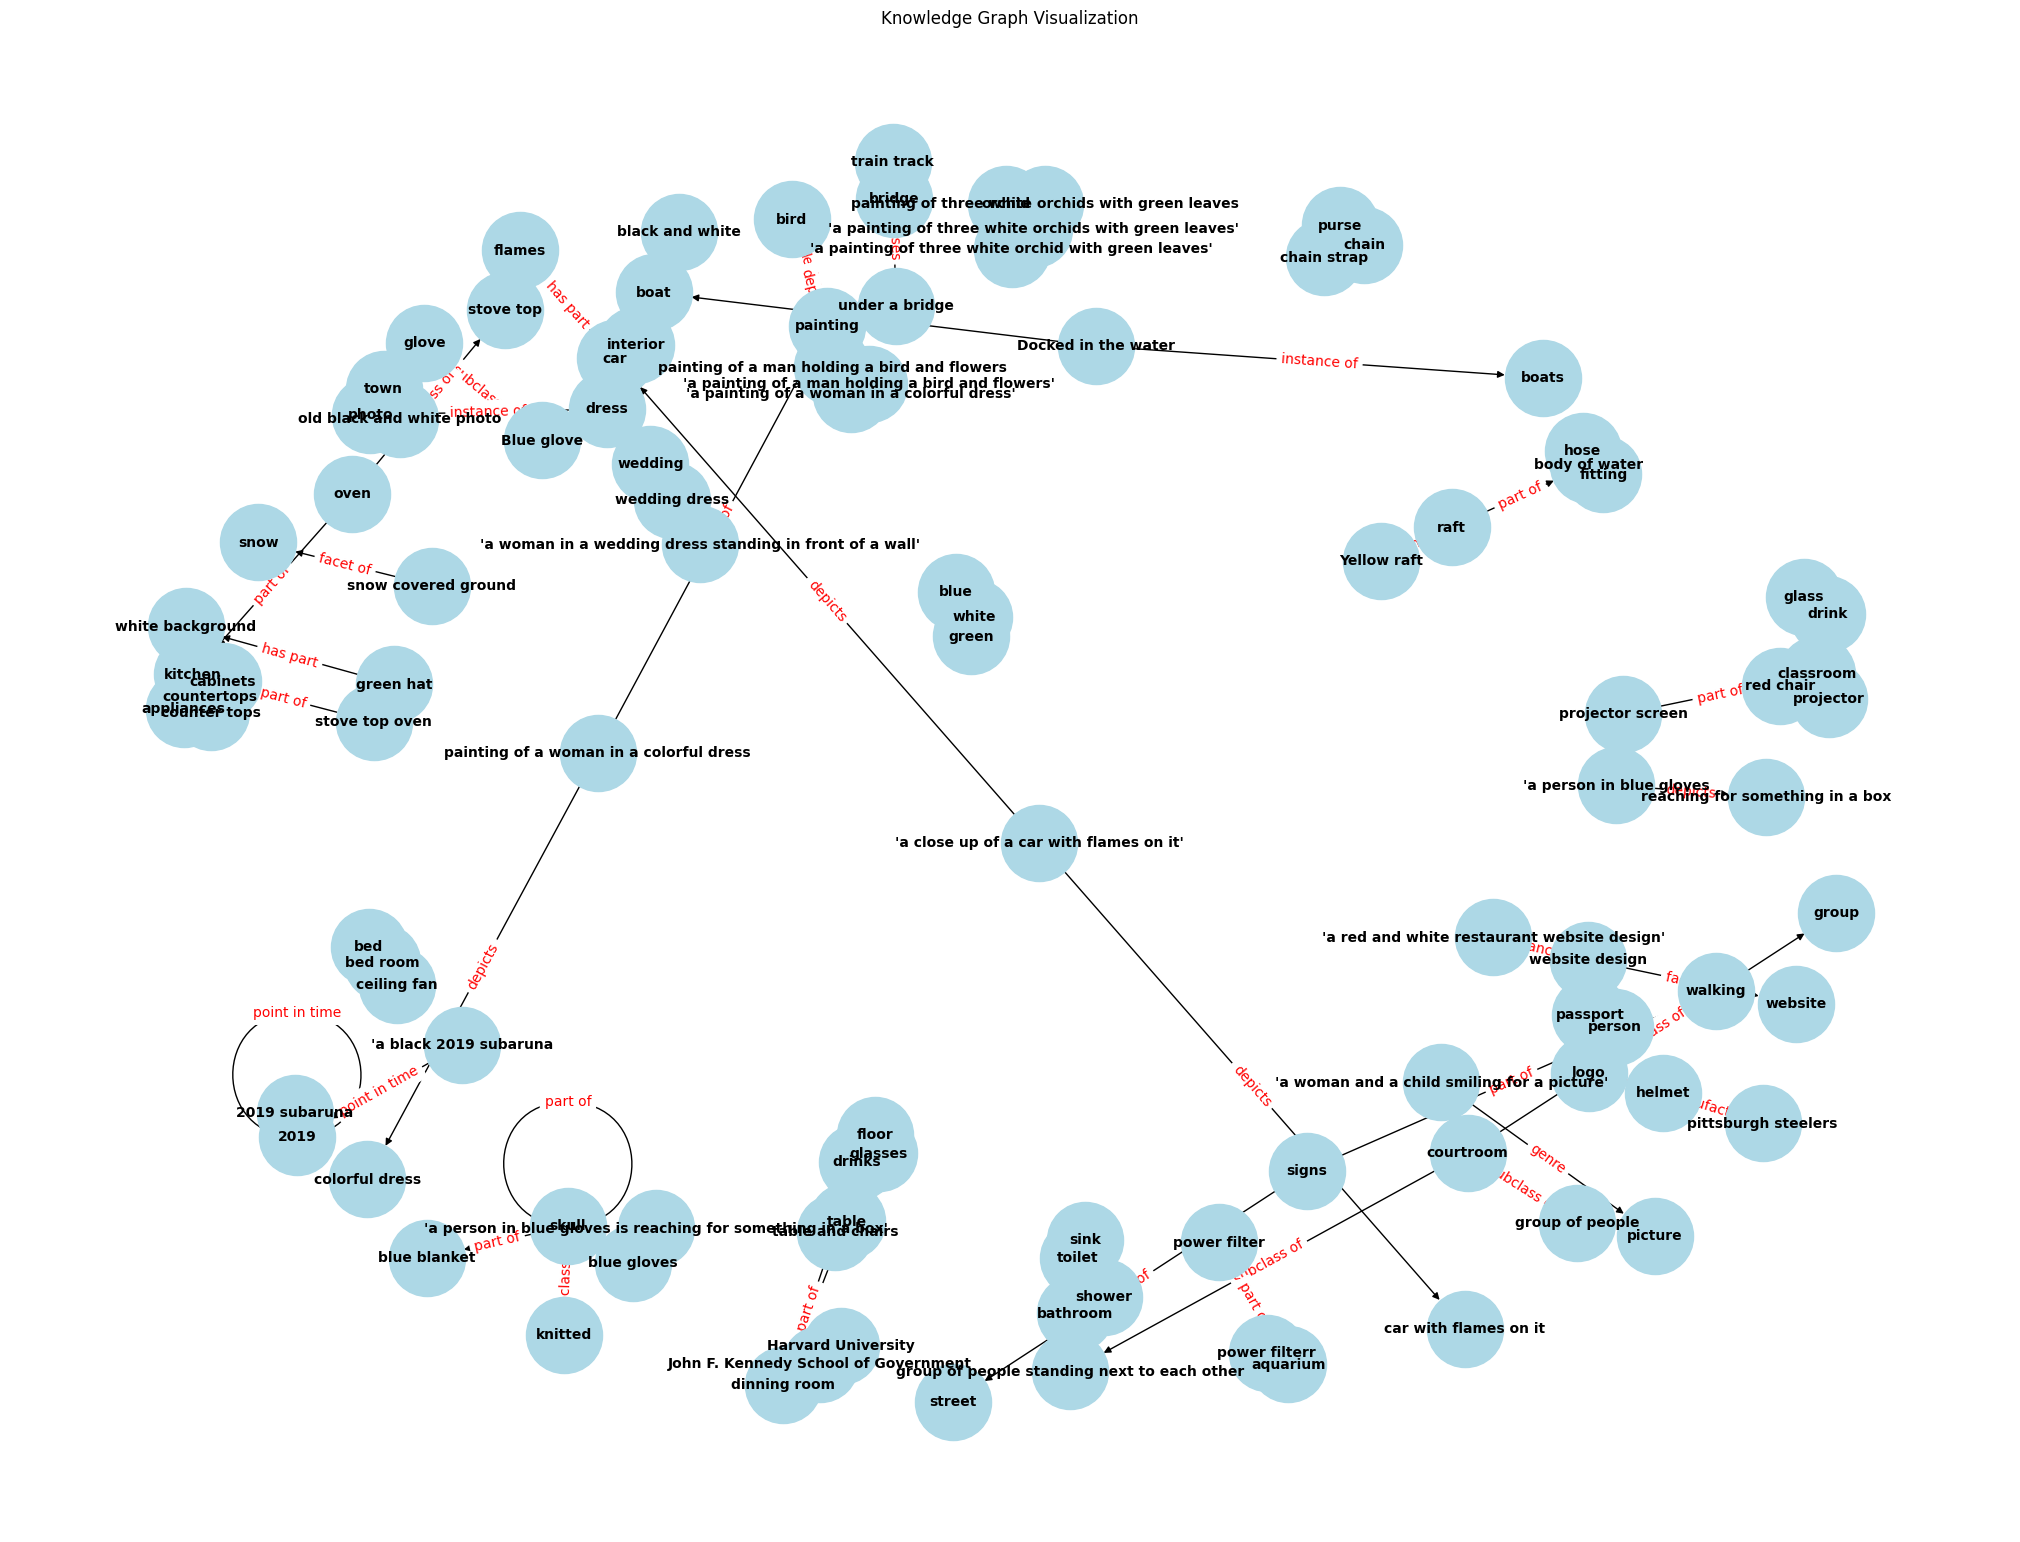

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.DiGraph()

# Add edges to the graph
for row in triplets:
    if isinstance(row, dict):  # Ensure the item is a dictionary
        G.add_edge(row['head'], row['tail'], label=row['type'])
# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
labels = nx.get_edge_attributes(G, 'label')

plt.figure(figsize=(20, 15))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')

plt.title('Knowledge Graph Visualization')
plt.show()

## Plotly with NetworkX Di-graph

Plotly is an interactive graphing library, and when combined with NetworkX, it allows for the creation of interactive network visualizations. This method is especially useful when you need to interact with the graph data, such as when exploring relationships or debugging the structure of your knowledge graph. 

Here, we use Plotly to generate an interactive graph that can be zoomed, panned, and explored directly in the browser.

In [28]:
import plotly.graph_objects as go
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for record in triplets:
    G.add_edge(record['head'], record['tail'], label=record['type'])

pos = nx.spring_layout(G)

# Extract edge labels
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=2, color='#888'),
    hoverinfo='none',
    mode='lines')

config = {
    'scrollZoom': True,       # Enable scroll to zoom
    'modeBarButtonsToRemove': [ 'select2d', 'lasso2d',
                                'autoScale2d',
                               'resetScale2d', 'hoverClosestCartesian',
                               'hoverCompareCartesian', 'toggleSpikelines'],
    'displaylogo': True      # Hide the Plotly logo
}


# Extract node labels
node_x = []
node_y = []
for node in pos:
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=[node for node in G.nodes()],
    textposition="bottom center",
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='YlGnBu',
        size=30,
        line_width=1
    )
)

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Network graph made with Plotly',
                titlefont_size=32,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/python/network-graphs/'> link</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False,showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False,showticklabels=False))
                )

fig.update_layout(
    dragmode='zoom',  # Set default dragmode to zoom
    modebar_add=['zoomIn2d', 'zoomOut2d', 'zoom2d','zoomIn2d', 'zoomOut2d']
)

fig.show(config=config)


The graph is displayed interactively in the notebook, with no direct file output.

Layout is spring- you can change to different distribution
- Circular- pos = nx.circular_layout(G)
- Kamada-Kawai Layout- pos = nx.kamada_kawai_layout(G)
- Shell Layout- pos = nx.shell_layout(G)
- Spectral Layout- pos = nx.spectral_layout(G)

## Graphviz
Graphviz is an open-source graph visualization software that uses a description language called DOT. It's useful when you need a static, detailed visualization of your knowledge graph that can be shared or printed.

Here, Graphviz is used to generate a directed graph based on the extracted triplets, which is then rendered and saved.

In [29]:
from graphviz import Digraph

# Create a Digraph object
dot = Digraph()

# Add nodes and edges to the Digraph
for record in triplets:
    dot.node(record['head'])
    dot.node(record['tail'])
    dot.edge(record['head'], record['tail'], label=record['type'])

# Render and display the graph in the notebook
dot.render('knowledge_graph', view=True)


'knowledge_graph.pdf'

In [30]:
files.download('knowledge_graph.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>